                            WLS Regression Results                            
Dep. Variable:                      x   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.438e+04
Date:                Tue, 12 Sep 2017   Prob (F-statistic):           1.35e-07
Time:                        15:22:26   Log-Likelihood:                -12.798
No. Observations:                   5   AIC:                             29.60
Df Residuals:                       3   BIC:                             28.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0333      3.865     -0.526      0.6

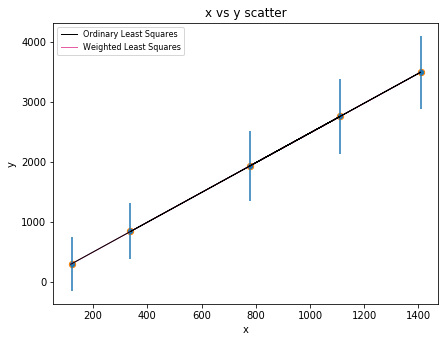

In [75]:
%matplotlib inline

from __future__ import print_function

import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

energy_list = [121.8, 1408, 778.9, 1112, 334.3,]
channel_list = [296.9, 3500, 1933, 2763, 850.9]
channel_err = np.array([4.470, 6.085, 5.795, 6.306, 4.654])

weights = 1/np.power(channel_err, 2)

# put x and y into a pandas DataFrame, and the weights into a Series
ws = pd.DataFrame({
    'x': energy_list,
    'y': channel_list,
    'yerr': map(lambda x: x * 100, channel_err)
})

wls_fit = sm.wls('x ~ y', data=ws, weights=1 / weights).fit()
ols_fit = sm.ols('x ~ y', data=ws).fit()

# show the fit summary by calling wls_fit.summary()

print(wls_fit.summary())

# let's plot our data
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
ws.plot(
    kind='scatter',
    x='x',
    y='y',
    yerr='yerr',
    style='o',
    alpha=1.,
    ax=ax,
    title='x vs y scatter',
    edgecolor='#ff8300',
    s=40
)

# weighted prediction
wp, = ax.plot(
    wls_fit.predict(),
    ws['y'],
    color='#e55ea2',
    lw=1.,
    alpha=1.0,
)
# unweighted prediction
op, = ax.plot(  
    ols_fit.predict(),
    ws['y'],
    color='k',
    ls='solid',
    lw=1,
    alpha=1.0,
)
leg = plt.legend(
    (op, wp),
    ('Ordinary Least Squares', 'Weighted Least Squares'),
    loc='upper left',
    fontsize=8)

plt.tight_layout()
fig.set_size_inches(6.40, 5.12)
plt.savefig("so.png", dpi=100, alpha=True)
plt.show()

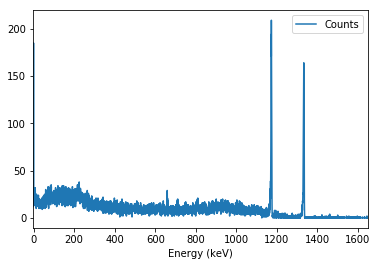

In [76]:
plt.figure(1)
co60 = pd.read_csv("data/co60.csv", names=['Channel','Counts'], header=0)
co60['Energy (keV)'] = co60['Channel'].apply(lambda x: x*wls_fit.params['y'] + wls_fit.params['Intercept'])
co60.plot(x='Energy (keV)', y='Counts')
plt.show()

In [77]:
co60_compton = co60.loc[(co60['Energy (keV)'] >= 1040) & (co60['Energy (keV)'] <=1096), ['Energy (keV)', 'Counts', 'Channel']]
compton_counts_mean = co60_compton.mean()['Counts']

In [78]:
co60_compton

,Energy (keV),Counts,Channel
2586,1040.206401,10,2586
2587,1040.609433,5,2587
2588,1041.012464,4,2588
2589,1041.415496,4,2589
2590,1041.818527,9,2590
2591,1042.221559,9,2591
2592,1042.624591,10,2592
2593,1043.027622,2,2593
2594,1043.430654,8,2594
2595,1043.833685,4,2595


In [79]:
co60_compton.Channel

2586    2586
2587    2587
2588    2588
2589    2589
2590    2590
2591    2591
2592    2592
2593    2593
2594    2594
2595    2595
2596    2596
2597    2597
2598    2598
2599    2599
2600    2600
2601    2601
2602    2602
2603    2603
2604    2604
2605    2605
2606    2606
2607    2607
2608    2608
2609    2609
2610    2610
2611    2611
2612    2612
2613    2613
2614    2614
2615    2615
        ... 
2695    2695
2696    2696
2697    2697
2698    2698
2699    2699
2700    2700
2701    2701
2702    2702
2703    2703
2704    2704
2705    2705
2706    2706
2707    2707
2708    2708
2709    2709
2710    2710
2711    2711
2712    2712
2713    2713
2714    2714
2715    2715
2716    2716
2717    2717
2718    2718
2719    2719
2720    2720
2721    2721
2722    2722
2723    2723
2724    2724
Name: Channel, Length: 139, dtype: int64

In [80]:
def energy_error(channel, slope_uncertainty = wls_fit.bse['y'], intercept_uncertainty = wls_fit.bse['Intercept']):
    slope_error = channel * slope_uncertainty
    error = math.sqrt((slope_error ** 2) + intercept_uncertainty **2)
    
    return error

In [84]:
co60_compton_error = map(energy_error, co60_compton.Channel)
avg_co60_compton_error = np.mean(co60_compton_error)
print(avg_co60_compton_error)

5.72075894557


In [70]:
#wls_fit.params['Intercept']
print(wls_fit.bse['Intercept']) # standard error on wls
print(wls_fit.bse['y']) # standard error on wls

3.8651685521
0.00158844052871


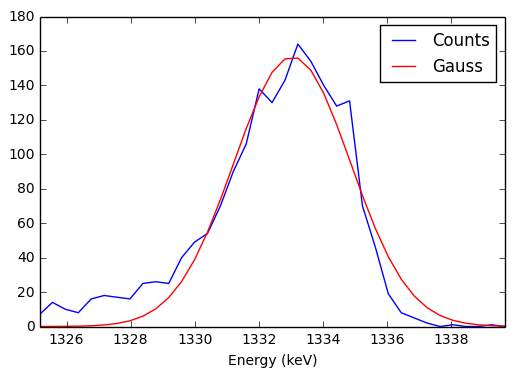

In [47]:
from scipy.optimize import curve_fit

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

mean = 1332
std = 5

co60_peak = co60.loc[(co60['Energy (keV)'] >= 1325) & (co60['Energy (keV)'] <=1340), ['Energy (keV)', 'Counts']]
popt, pcov = curve_fit(gauss_function, co60_peak['Energy (keV)'], co60_peak['Counts'], p0 = [1, mean, std])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
co60_peak.plot(x='Energy (keV)', y='Counts', ax=ax)
co60_peak['Gauss'] = co60_peak['Energy (keV)'].apply(lambda x: gauss_function(x, popt[0], popt[1], popt[2]))
co60_peak.plot(x='Energy (keV)', y='Gauss', ax=ax, color='red')
plt.show()

In [48]:
co60_1173_counts = gauss_function(popt[1], popt[0], popt[1], popt[2])
peak_to_compton = co60_1173_counts / compton_counts_mean
print(peak_to_compton)

20.3045767251


In [ ]:
##
# Peak/compton error
##